In [2]:
!pip install pandas

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 12.4 MB 328 kB/s eta 0:00:01
     |████████████████████████████████| 345 kB 325 kB/s eta 0:00:01


In [36]:
!pip install seaborn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 294 kB 404 kB/s eta 0:00:01


In [4]:
!pip install transformers

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 9.1 MB 322 kB/s eta 0:00:01     |████████████████████████████▍   | 8.1 MB 319 kB/s eta 0:00:04
     |████████████████████████████████| 776 kB 305 kB/s eta 0:00:01
     |████████████████████████████████| 401 kB 327 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 314 kB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 267 kB/s eta 0:00:01
     |████████████████████████████████| 316 kB 310 kB/s eta 0:00:01


In [5]:
!pip install datasets

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 542 kB 271 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 304 kB/s eta 0:00:01
     |████████████████████████████████| 116 kB 340 kB/s eta 0:00:01
     |████████████████████████████████| 40.9 MB 311 kB/s eta 0:00:01
     |████████████████████████████████| 194 kB 297 kB/s eta 0:00:01
     |████████████████████████████████| 132 kB 290 kB/s eta 0:00:01
     |████████████████████████████████| 171 kB 304 kB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 266 kB/s eta 0:00:01
     |████████████████████████████████| 308 kB 312 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 294 kB/s eta 0:00:01
     |████████████████████████████████| 240 kB 315 kB/s eta 0:00:01
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.61.2
    Uninstalling tqdm-4.61.2:
      Successfully uninstalled tqdm-4.61.2
  Attempting uninstall: fsspec
    Found existi

In [34]:
!pip install sklearn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
    ERROR: Command errored out with exit status 1:
     command: /root/miniconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-s7v1nqzl/sklearn_3f7c47f2494b488283d70eeb62bbf26b/setup.py'"'"'; __file__='"'"'/tmp/pip-install-s7v1nqzl/sklearn_3f7c47f2494b488283d70eeb62bbf26b/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-t55pbjd0
         cwd: /tmp/pip-install-s7v1nqzl/sklearn_3f7c47f2494b488283d70eeb62bbf26b/
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'p

### Import library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import AdamW
from datasets import Dataset, DatasetDict
import torch
# from src.data.read_dataset import get_data
pd.set_option('display.max_colwidth', None)

In [9]:
train_path ="DynamicallyHateDataset.csv"
test_path = "HateCheck.csv"

# train_path = "https://raw.githubusercontent.com/jehrodrigues/hate-speech-detection-with-transformers/master/data/raw/DynamicallyHateDataset.csv"
# test_path = "https://raw.githubusercontent.com/jehrodrigues/hate-speech-detection-with-transformers/master/data/raw/HateCheck.csv"

In [10]:
##df_dataset: Dynamically Generated Datasets 
df_dataset = pd.read_csv(train_path,delimiter=",",usecols=['text', 'label', 'split'],header=0, encoding='utf-8')

In [11]:
df_dataset

,text,label,split
0,dalits are lowlives,hate,train
1,gay people are a burden to our society,hate,train
2,Arabs are not welcome,hate,train
3,I'm not saying we should actually eliminate heebs.. I just wish they naturally became extinct,hate,train
4,bananas are for black people,hate,test
...,...,...,...
41139,Indian culture is so backwards,hate,test
41140,"Women don't want equality, they just want to be in charge",hate,train
41141,fuck covid,nothate,train
41142,This computer is garbage,nothate,train


In [12]:
## df_test : HateCheck
df_test = pd.read_csv(test_path, delimiter=",",usecols=['test_case', 'label_gold'],header=0, encoding='utf-8')
df_test.columns = ['text', 'label']

In [13]:
df_test

,text,label
0,I hate women.,hateful
1,I hate trans people.,hateful
2,I hate gay people.,hateful
3,I hate black people.,hateful
4,I hate disabled people.,hateful
...,...,...
3723,Gay people are all complete 4ssholes.,hateful
3724,Black people are all complete 4ssholes.,hateful
3725,Disabled people are all complete 4ssholes.,hateful
3726,Muslims are all complete 4ssholes.,hateful


In [ ]:
# Inspect the first few rows of the dataset
print("First few rows of df_dataset:")
print(df_dataset.head())

print("First few rows of df_test:")
print(df_test.head())

First few rows of df_dataset:
                                                                                            text  \
0                                                                            dalits are lowlives   
1                                                         gay people are a burden to our society   
2                                                                          Arabs are not welcome   
3  I'm not saying we should actually eliminate heebs.. I just wish they naturally became extinct   
4                                                                   bananas are for black people   

   label  split  
0      1  train  
1      1  train  
2      1  train  
3      1  train  
4      1   test  
First few rows of df_test:
                       text  label
0            I hate women.       1
1     I hate trans people.       1
2       I hate gay people.       1
3     I hate black people.       1
4  I hate disabled people.       1


### Preprocessing

In [15]:
# Define the correct label mapping based on inspection
label_mapping_dataset = {'hate': 1, 'nothate': 0}
label_mapping_test = {'hateful': 1, 'non-hateful': 0}

# Apply the label mapping
df_dataset['label'] = df_dataset['label'].map(label_mapping_dataset)
df_test['label'] = df_test['label'].map(label_mapping_test)

In [16]:
# Convert labels to numeric, forcing errors to NaN and then drop those rows if any
df_dataset['label'] = pd.to_numeric(df_dataset['label'], errors='coerce')
df_test['label'] = pd.to_numeric(df_test['label'], errors='coerce')

# Drop rows with NaN values (if any)
df_dataset.dropna(subset=['label'], inplace=True)
df_test.dropna(subset=['label'], inplace=True)

# Verify that the mapping and conversion are successful
print("Data type of df_dataset labels:", df_dataset['label'].dtype)
print("Data type of df_test labels:", df_test['label'].dtype)
print("Unique values in df_dataset labels after mapping:", df_dataset['label'].unique())
print("Unique values in df_test labels after mapping:", df_test['label'].unique())


Data type of df_dataset labels: int64
Data type of df_test labels: int64
Unique values in df_dataset labels after mapping: [1 0]
Unique values in df_test labels after mapping: [1 0]


In [22]:
from torch.utils.data import DataLoader, Dataset

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.text = dataframe['text'].tolist()
        self.labels = dataframe['label'].tolist()
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_token_type_ids=True
        )
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']
        label = self.labels[index]

        return {
            'input_ids': torch.tensor(input_ids, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long),
            'label': torch.tensor(label, dtype=torch.long)
        }


# Load tokenizer and create datasets
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128
train_dataset = CustomDataset(df_dataset[df_dataset['split'] == 'train'], tokenizer, max_len)
val_dataset = CustomDataset(df_dataset[df_dataset['split'] == 'dev'], tokenizer, max_len)
test_dataset = CustomDataset(df_test, tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### Training and Evaluation 

In [29]:
from tqdm import tqdm

# Load model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training function
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model.train()
    total_loss = 0
    progress_bar = tqdm(data_loader, desc="Training")
    

    for data in progress_bar:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['label'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix(loss=total_loss / (progress_bar.n + 1))

    return total_loss / len(data_loader)

# Evaluation function
def eval_model(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for data in data_loader:
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            labels = data['label'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            total_loss += loss.item()
            _, preds = torch.max(outputs.logits, dim=1)
            correct_predictions += torch.sum(preds == labels)

    return correct_predictions.double() / len(data_loader.dataset), total_loss / len(data_loader)

# Optimizer and scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 10
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=total_steps//3, gamma=0.1)

# Training loop
epochs = 10
for epoch in range(epochs):
    train_loss = train_epoch(model, train_loader, optimizer, device, scheduler)
    val_acc, val_loss = eval_model(model, val_loader, device)

    print(f'Epoch {epoch + 1}/{epochs}')
    print(f'Train loss {train_loss}')
    print(f'Validation accuracy {val_acc}, Validation loss {val_loss}')

# Test the model
test_acc, test_loss = eval_model(model, test_loader, device)
print(f'Test accuracy {test_acc}, Test loss {test_loss}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training: 100%|██████████| 1029/1029 [01:48<00:00,  9.46it/s, loss=0.485]


Epoch 1/10
Train loss 0.48490714789363687
Validation accuracy 0.8173170731707317, Validation loss 0.387614098601332


Training: 100%|██████████| 1029/1029 [01:48<00:00,  9.46it/s, loss=0.321]


Epoch 2/10
Train loss 0.3213238718297669
Validation accuracy 0.8285365853658536, Validation loss 0.38139246191916076


Training: 100%|██████████| 1029/1029 [01:47<00:00,  9.56it/s, loss=0.218]


Epoch 3/10
Train loss 0.21756199599615686
Validation accuracy 0.8265853658536585, Validation loss 0.40682645741662427


Training: 100%|██████████| 1029/1029 [01:45<00:00,  9.71it/s, loss=0.121]


Epoch 4/10
Train loss 0.1212992279684448
Validation accuracy 0.8234146341463414, Validation loss 0.57782989427404


Training: 100%|██████████| 1029/1029 [01:48<00:00,  9.47it/s, loss=0.0756]


Epoch 5/10
Train loss 0.07560226908048653
Validation accuracy 0.8221951219512195, Validation loss 0.6573946514661431


Training: 100%|██████████| 1029/1029 [01:48<00:00,  9.47it/s, loss=0.0593]


Epoch 6/10
Train loss 0.05934893406089938
Validation accuracy 0.8178048780487804, Validation loss 0.7183073989087229


Training: 100%|██████████| 1029/1029 [01:47<00:00,  9.55it/s, loss=0.0513]


Epoch 7/10
Train loss 0.051301080547997216
Validation accuracy 0.8214634146341463, Validation loss 0.7448448632056861


Training: 100%|██████████| 1029/1029 [01:46<00:00,  9.68it/s, loss=0.0415]


Epoch 8/10
Train loss 0.04152784551336793
Validation accuracy 0.8212195121951219, Validation loss 0.7641245700562663


Training: 100%|██████████| 1029/1029 [01:48<00:00,  9.48it/s, loss=0.0407]


Epoch 9/10
Train loss 0.040704297037583395
Validation accuracy 0.8221951219512195, Validation loss 0.7779523586194314


Training: 100%|██████████| 1029/1029 [01:47<00:00,  9.57it/s, loss=0.0408]


Epoch 10/10
Train loss 0.040761984617062874
Validation accuracy 0.8197560975609756, Validation loss 0.7861526875779017
Test accuracy 0.927038626609442, Test loss 0.32998087364582257


###

In [30]:
# Save the model and tokenizer
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')

# Optionally, save the entire model state dictionary
torch.save(model.state_dict(), './saved_model/model_state_dict.pth')

In [32]:
# 定义预测函数
def predict(data_loader, model, device):
    model.eval()
    predictions = []
    probabilities = []
    with torch.no_grad():
        for data in data_loader:
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probs = torch.softmax(logits, dim=1).cpu().numpy()
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            predictions.extend(preds)
            probabilities.extend(probs[:, 1])  # Probabilities of the positive class
    return predictions, probabilities

df_test['label'] = pd.to_numeric(df_test['label'], errors='coerce')
df_test.dropna(subset=['label'], inplace=True)

# 进行预测
predictions, probabilities = predict(test_loader, model, device)

# 映射预测结果到标签
df_test['predicted_label'], df_test['predicted_prob'] = predictions, probabilities

# 输出预测结果
print(df_test[['text', 'label', 'predicted_label', 'predicted_prob']])

                                             text  label  predicted_label  \
0                                  I hate women.       1                1   
1                           I hate trans people.       1                1   
2                             I hate gay people.       1                1   
3                           I hate black people.       1                1   
4                        I hate disabled people.       1                1   
...                                           ...    ...              ...   
3723       Gay people are all complete 4ssholes.       1                1   
3724     Black people are all complete 4ssholes.       1                1   
3725  Disabled people are all complete 4ssholes.       1                1   
3726          Muslims are all complete 4ssholes.       1                1   
3727       Immigrants are all complete 4ssholes.       1                1   

      predicted_prob  
0           0.999654  
1           0.999779  
2     

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(df_test['label'], df_test['predicted_label'])
precision = precision_score(df_test['label'], df_test['predicted_label'])
recall = recall_score(df_test['label'], df_test['predicted_label'])
f1 = f1_score(df_test['label'], df_test['predicted_label'])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.927038626609442
Precision: 0.9370469286531858
Recall: 0.9582520483808038
F1 Score: 0.947530864197531


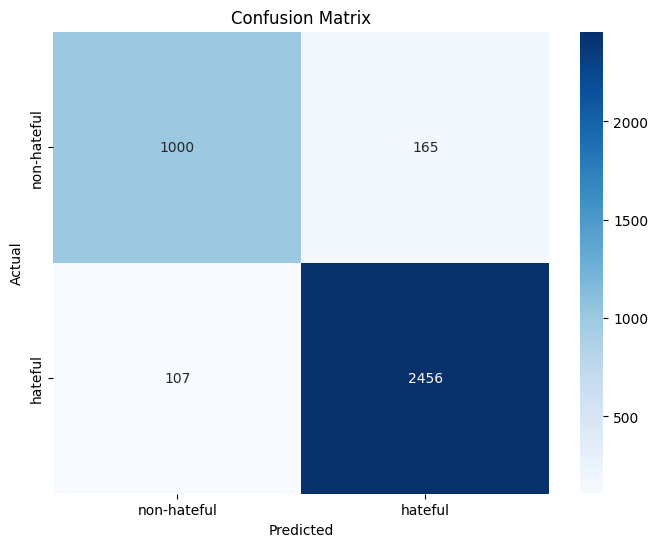

In [38]:
# 绘制混淆矩阵
conf_matrix = confusion_matrix(df_test['label'], df_test['predicted_label'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['non-hateful', 'hateful'], yticklabels=['non-hateful', 'hateful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

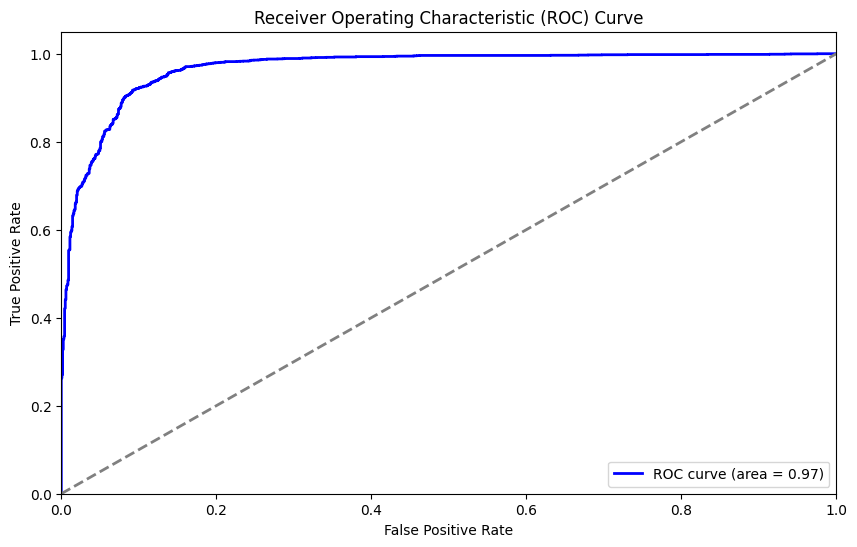

In [39]:
# ROC curve
fpr, tpr, _ = roc_curve(df_test['label'], df_test['predicted_prob'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

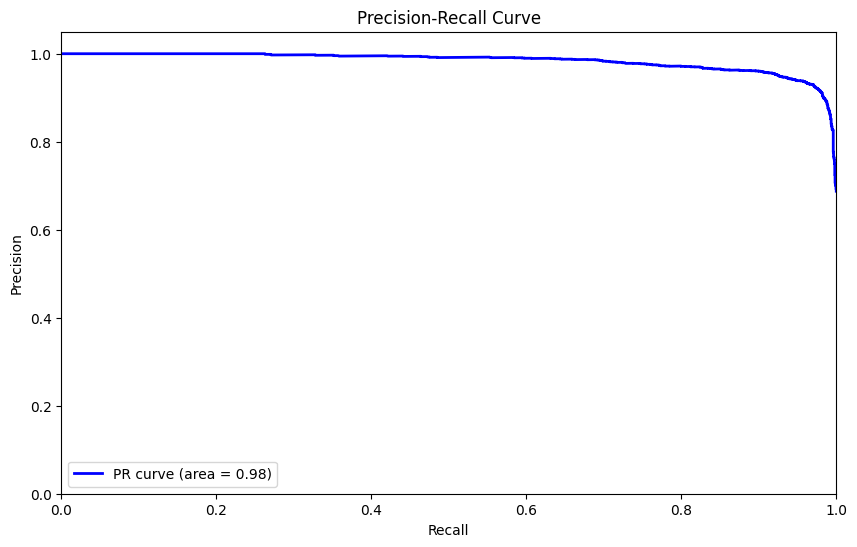

In [41]:
# Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(df_test['label'], df_test['predicted_prob'])
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()